In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
df1= pd.read_csv("/content/cleaned_dataset.csv")
df1.head(10)

,Unnamed: 0,Text,language,cleaned_Text
0,0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian,klement gottwaldi surnukeha palsameeriti ning ...
1,1,sebes joseph pereira thomas på eng the jesuit...,Swedish,sebes joseph pereira thomas på eng the jesuits...
2,2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...
3,3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...
4,4,de spons behoort tot het geslacht haliclona en...,Dutch,de spons behoort tot het geslacht haliclona en...
5,5,tsutinalar i̇ngilizce tsuutina kanadada albert...,Turkish,tsutinalar i̇ngilizce tsuutina kanadada albert...
6,6,müller mox figura centralis circulorum doctoru...,Latin,müller mox figura centralis circulorum doctoru...
7,7,برقی بار electric charge تمام زیرجوہری ذرات کی...,Urdu,برقی بار electric charge تمام زیرجوہری ذرات کی...
8,8,kemunculan pertamanya adalah ketika mencium ka...,Indonesian,kemunculan pertamanya adalah ketika mencium ka...
9,9,barocco pt escândalo de ª página é um filme fr...,Portugese,baro o pt escândalo de ª página é um filme fra...


In [3]:
X= df1["cleaned_Text"]
y= df1["language"]

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
y= encoder.fit_transform(y)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Assuming you have labels in y (target variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CountVectorizer
CV = CountVectorizer()

# Fit and transform the training data
X_train_sparse = CV.fit_transform(X_train)

# Transform the test data
X_test_sparse = CV.transform(X_test)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'MNB' : MultinomialNB()
}

In [7]:
%%time
for name, model in models.items():
    print(f'{name} training started...')
    model.fit(X_train_sparse, y_train)
    print(f'{name} trained')

K-Nearest Neighbors training started...
K-Nearest Neighbors trained
Random Forest training started...
Random Forest trained
MNB training started...
MNB trained
CPU times: user 57 s, sys: 235 ms, total: 57.2 s
Wall time: 58.3 s


In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report

In [9]:
%%time
for name in models:
    acc_score= round(accuracy_score(y_test, models.get(name).predict(X_test_sparse)), 3)
    print(f'{name} accuracy score :  {acc_score}')

K-Nearest Neighbors accuracy score :  0.678
Random Forest accuracy score :  0.981
MNB accuracy score :  0.982
CPU times: user 2.09 s, sys: 740 ms, total: 2.83 s
Wall time: 2.83 s


In [10]:
for name in models:
    print(f'{name} classification report')
    print("-------------------------------")
    print(classification_report(y_test, models.get(name).predict(X_test_sparse)))
    print("******************************")
    print(" ")

K-Nearest Neighbors classification report
-------------------------------
              precision    recall  f1-score   support

           0       1.00      0.51      0.68       193
           1       0.99      0.88      0.93       210
           2       0.92      0.79      0.85       183
           3       0.88      0.72      0.80       191
           4       0.91      0.90      0.90       200
           5       0.15      0.99      0.26       190
           6       0.98      0.58      0.73       195
           7       1.00      0.03      0.06       201
           8       0.93      0.61      0.74       177
           9       1.00      0.78      0.88       216
          10       0.96      0.73      0.83       203
          11       1.00      0.71      0.83       199
          12       0.99      0.79      0.88       200
          13       0.99      0.42      0.59       179
          14       0.96      0.87      0.91       189
          15       1.00      0.84      0.91       175
       

K-Nearest Neighbors ConfusionMatrix


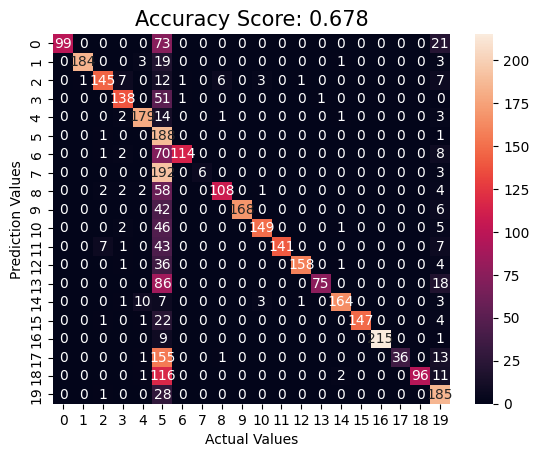

******************************
 
Random Forest ConfusionMatrix


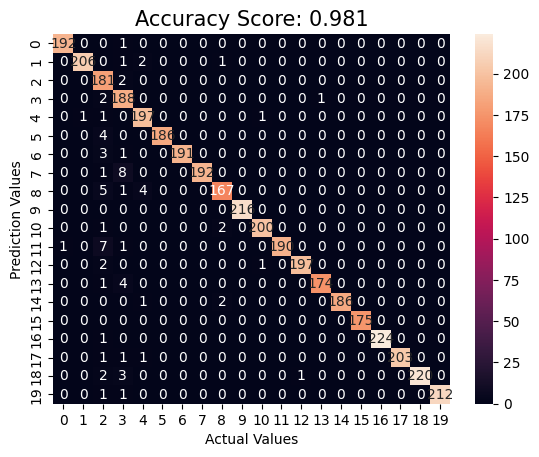

******************************
 
MNB ConfusionMatrix


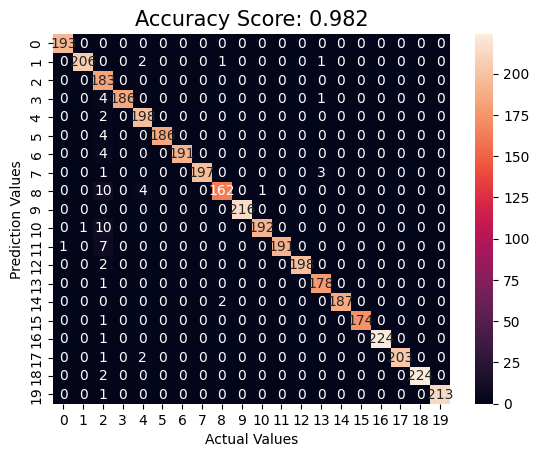

******************************
 


In [11]:
for name in models:
    print(f'{name} ConfusionMatrix')
    predictions= models.get(name).predict(X_test_sparse)
    score = round(accuracy_score(y_test, models.get(name).predict(X_test_sparse)), 3)
    confusionMatrix = CM(y_test, models.get(name).predict(X_test_sparse))
    sns.heatmap(confusionMatrix, annot=True, fmt=".0f")
    plt.xlabel('Actual Values')
    plt.ylabel('Prediction Values')
    plt.title('Accuracy Score: {0}'.format(score), size = 15)
    plt.show()
    print("******************************")
    print(" ")

In [12]:
def prediction(text):
    x = CV.transform([text]).toarray()
    probabilities = model.predict_proba(x)
    max_prob = probabilities.max()
    threshold=0.75
    if max_prob < threshold:
        return "Unknown"
    else:
        lang_idx = probabilities.argmax()
        predicted_language = encoder.inverse_transform([lang_idx])[0]
        return predicted_language

In [17]:
prediction("prediction(\"El libro inmediatamente se hizo ampliamente conocido y se encontró con total confianza en los círculos administrativos y públicos rusos y fue enviado a lugares públicos en toda Rusia, junto con la administración, Brafman también ganó autoridad en la prensa y contribuyó significativamente al crecimiento del movimiento antisemita, los antisemitas se refirieron a sus libros como una fuente seria y confiable\")")

'Spanish'

In [14]:
prediction("क्या हो रहा हैं ।")

'Hindi'

In [20]:
prediction("หนังสือเล่มนี้กลายเป็นที่รู้จักอย่างกว้างขวางทันทีและพบกับความมั่นใจอย่างสมบูรณ์ในแวดวงการบริหารและสาธารณะของรัสเซียและถูกส่งไปยังสถานที่สาธารณะทั่วรัสเซียพร้อมกับการบริหาร Brafman ยังได้รับอํานาจในสื่อและมีส่วนสําคัญต่อการเติบโตของขบวนการต่อต้านเซมิติกต่อต้านเซมิตีอ้างถึงหนังสือของเขาเป็นแหล่งที่เชื่อถือได้อย่างจริงจัง")

'Thai'

In [21]:
prediction("આ પુસ્તક તરત જ વ્યાપકપણે જાણીતું બન્યું હતું અને વહીવટી અને રશિયન જાહેર વર્તુળોમાં સંપૂર્ણ વિશ્વાસ સાથે તેને મળ્યું હતું અને તેને સમગ્ર રશિયામાં જાહેર સ્થળોએ મોકલવામાં આવ્યું હતું, વહીવટીતંત્રની સાથે સાથે, બ્રાફમેને પણ પ્રેસમાં સત્તા મેળવી હતી અને સેમિટિક-વિરોધી ચળવળના વિકાસમાં નોંધપાત્ર ફાળો આપ્યો હતો, સેમિટ્સ-વિરોધીએ તેમના પુસ્તકોનો ગંભીર વિશ્વસનીય સ્રોત તરીકે ઉલ્લેખ કર્યો હતો")

'Unknown'